# 1a

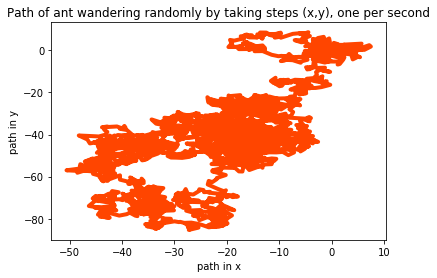

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import random

def path_finder(time_in_s, initial_x=0, initial_y=0):

    curr_pos_x = initial_x
    curr_pos_y = initial_y

    global path_x
    global path_y
    path_x = [curr_pos_x]
    path_y = [curr_pos_y]

    for n in range(0, time_in_s):
        curr_pos_x = curr_pos_x + np.random.normal()
        curr_pos_y = curr_pos_y + np.random.normal()
        path_x.append(curr_pos_x)
        path_y.append(curr_pos_y)

path_finder(3600)

x = path_x
y = path_y

fig = plt.figure()
ax = plt.axes()

#plt.axis([-50, 50, -50, 50])
plt.plot(x, y, color='orangered', linewidth=4)
plt.xlabel('path in x')
plt.ylabel('path in y')
plt.title('Path of ant wandering randomly by taking steps (x,y), one per second')
#plt.scatter(x, y, color='orange', marker='^')
#ax.xaxis.set(ticks=range(0,21),)
plt.savefig('foo.png')
plt.show()

# 1b

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import random
from math import sqrt

def path_finder(time_in_s, initial_x=0, initial_y=0):
    curr_pos_x = initial_x
    curr_pos_y = initial_y

    global path_x
    global path_y
    path_x = [curr_pos_x]
    path_y = [curr_pos_y]

    for n in range(0, time_in_s):
        curr_pos_x = curr_pos_x + np.random.normal()
        curr_pos_y = curr_pos_y + np.random.normal()
        path_x.append(curr_pos_x)
        path_y.append(curr_pos_y)

def nest_finder(time_in_s, nest_dist, nest_pos_x=0, nest_pos_y=0):
    path_finder(time_in_s)

    food_pos_x = path_x[-1]
    food_pos_y = path_y[-1]

    curr_pos_x = food_pos_x
    curr_pos_y = food_pos_y

    found_nest = False

    for n in range(0, time_in_s):
        curr_pos_x = curr_pos_x + np.random.normal()
        curr_pos_y = curr_pos_y + np.random.normal()
        dist_from_nest = sqrt(curr_pos_x ** 2 + curr_pos_y ** 2)

        if dist_from_nest <= nest_dist:
            found_nest = True
            break

    if found_nest:
        return True

    return False

def prob_finder(time_in_s, num_trials, nest_dist):
    found = 0
    n = 0
    while n < num_trials:
        if nest_finder(time_in_s, nest_dist) == True:
            found += 1
        n += 1
    return found / num_trials


prob = prob_finder(3600, 1000, 10)
print(prob)

0.219


In [4]:
### The probability I get is 0.2x with 1000 trials. Obviously, this is not a 
### good strategy because the ant is solely relying on a random steps to find 
### its way back to its nest. With 1000 trials, the probablility of finding the 
### nest is 0.2, which is certainly not a good number. Close to 80% of the time, 
### the ant will end up wandering around unable to find its way back to the nest, 
### therefore, this is not a good strategy. 

# 1c

In [10]:
def avg_closest(time_in_s, nest_pos_x=0, nest_pos_y=0):    
    
    path_finder(time_in_s)

    food_pos_x = path_x[-1]
    food_pos_y = path_y[-1]

    curr_pos_x = food_pos_x
    curr_pos_y = food_pos_y

    closest_dist = sqrt(food_pos_x ** 2 + food_pos_y ** 2)
    
    for n in range(0, time_in_s):
        curr_pos_x = curr_pos_x + np.random.normal()
        curr_pos_y = curr_pos_y + np.random.normal()
        
        curr_dist = sqrt(curr_pos_x ** 2 + curr_pos_y ** 2)

        if curr_dist < closest_dist:
            closest_dist = curr_dist

    return closest_dist     

def prob_finder(time_in_s, num_trials):
    
    n = 0
    closest_dist_sum = 0
    
    while n < num_trials:
    
        closest_dist_sum += avg_closest(time_in_s)
        n += 1
    return closest_dist_sum / num_trials

closest_avg = prob_finder(3600, 1000)
print(closest_avg)

47.558947560537014


In [6]:
### Average closest distance would be 45 based on 1000 trial runs.

# 2

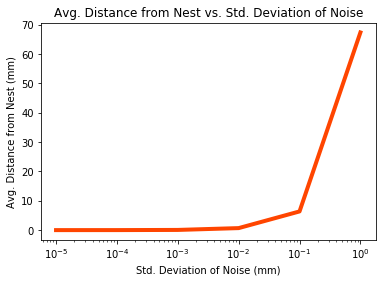

In [14]:
def memory_vector_finder(time_in_s, std_dev, initial_x=0, initial_y=0):
    curr_pos_x = initial_x
    curr_pos_y = initial_y
    memory_x = initial_x
    memory_y = initial_y
    for n in range(0, time_in_s):   
        x_step = np.random.normal()
        y_step = np.random.normal()
        curr_pos_x = curr_pos_x + x_step
        curr_pos_y = curr_pos_y + y_step
        memory_x =  (memory_x + x_step + np.random.normal(scale=std_dev))
        memory_y =  (memory_y + y_step + np.random.normal(scale=std_dev))
    dist_x = curr_pos_x - memory_x
    dist_y = curr_pos_y - memory_y
    dist = sqrt(dist_x**2 + dist_y**2)
    return dist
def avg_distance_finder(time_in_s, std_dev, num_trials):
    memory_vector_sum = 0
    for n in range(0, num_trials):
        memory_vector_sum += memory_vector_finder(time_in_s, std_dev)
    return memory_vector_sum / num_trials
t_1, t_2, t_3, t_4, t_5, t_6 = avg_distance_finder(3600, 1, 10), avg_distance_finder(3600, 0.1, 10), avg_distance_finder(3600, 0.01, 10), avg_distance_finder(3600, 0.001, 10), avg_distance_finder(3600, 0.0001, 10), avg_distance_finder(3600, 0.00001, 10)
y = [t_6, t_5, t_4, t_3, t_2, t_1]
x = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1]
fig = plt.figure()
ax = plt.axes()
ax.set_xscale('log')
plt.plot(x, y, color='orangered', linewidth=4)
plt.xlabel('Std. Deviation of Noise (mm)')
plt.ylabel('Avg. Distance from Nest (mm)')
plt.title('Avg. Distance from Nest vs. Std. Deviation of Noise')
plt.savefig('foo.png')
plt.show()


# 3a


In [1]:
def memory_vector_finder(time_in_s, std_dev, initial_x=0, initial_y=0):
    curr_pos_x = initial_x
    curr_pos_y = initial_y
    memory_x = initial_x
    memory_y = initial_y
    for n in range(0, time_in_s):
        x_step = np.random.normal()
        y_step = np.random.normal()
        curr_pos_x = curr_pos_x + x_step
        curr_pos_y = curr_pos_y + y_step
        memory_x =  (memory_x + x_step + np.random.normal(scale=std_dev))
        memory_y =  (memory_y + y_step + np.random.normal(scale=std_dev)) 
    dist_x = curr_pos_x - memory_x
    dist_y = curr_pos_y - memory_y
    dist = sqrt(dist_x**2 + dist_y**2)
    return dist
def avg_distance_finder(time_in_s, std_dev, num_trials):
    memory_vector_sum = 0
    for n in range(0, num_trials):
        memory_vector_sum += memory_vector_finder(time_in_s, std_dev)
    return memory_vector_sum / num_trials
def energy_finder(t_std_dev):
    return (np.exp(0.1 / t_std_dev[1]) + (t_std_dev[0] ** 2))
e1 = energy_finder(t1_std)
e2 = energy_finder(t2_std)
e3 = energy_finder(t3_std)
e4 = energy_finder(t4_std)
e5 = energy_finder(t5_std)
e6 = energy_finder(t6_std)
y = [e1, e2, e3, e4, e5, e6]
x = [1, 0.1, 0.01, 0.001, 0.0001, 0.00001]
fig = plt.figure()
ax = plt.axes()
ax.set_xscale('log')
ax.set_yscale('log')
plt.plot(x, y, color='orangered', linewidth=4)
plt.xlabel('Std. Deviation of Noise (mm)')
plt.ylabel('Avg. Energy Expended while on a Foraging Trip')
plt.title('Avg. Energy Expended vs. Std. Deviation of Noise')
plt.savefig('foo.png')
plt.show()

NameError: name 't1_std' is not defined

# 3b

In [ ]:
### The minimum energy is spent when the std. deviation is 0.1. From the evolutionary point of view, it makes 
### perfect sense for ants to adapt to 0.1 std to spend least amount of energy because this is the point where 
### there is optimal balance between the avg closest distance from a nest ants end up at & the energy spent. 
### If I compare the graph from 2 and 3a, when std=1.0, the distance from nest is significantly larger than 
### when std=1.0 and energy expenditure is also farily larger, so it is unfeasible for an ant to have evolved 
### to adapt to std=1.0. When std=0.01, there is tiny gain to reduce distance from distance, but its advantage is 
### very minimal compared to the significantly larger energy expenditure. Therefore, std of 0.1 is the perfect number 
### for an ant to have evolved to adapt to balance the energy and the probabiltiy of finding the food and finding 
### its way back to the nest.